# Install and Import Lib

In [ ]:
# environment set up:

# run in terminal:


# pip install autogen 
# pip install pyautogen
# pip install "autogen-ext[openai]"
# pip install dask


# how to store the open ai key
# conda activate AI_Agent
# conda env config vars set OPENAI_API_KEY="sk-****"
# conda deactivate && conda activate AI_Agent  
# conda env config vars list

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
import os
from autogen import AssistantAgent, UserProxyAgent, ConversableAgent
from autogen.coding import LocalCommandLineCodeExecutor

In [3]:
import os

OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")
# print(OPENAI_API_KEY)

# Agents

## Initiate the Command Line Code executor

You'll see a folder created with "code" name.

* I'm using Google Colab. I'm seeing it in the top left menu ==> folders ==> "Code"

In [4]:
code_executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="code",
)

In [5]:
# check it exist
import os

work_dir = "code"

if os.path.exists(work_dir) and os.path.isdir(work_dir):
    print(f"The directory '{work_dir}' exists.")
else:
    print(f"The directory '{work_dir}' does NOT exist.")


The directory 'code' exists.


## LLM Config

In [6]:
config_list = [{"model": "gpt-4o-mini", "api_key": OPENAI_API_KEY}]

## AssistantAgent & UserProxyAgent

We will create AssistantAgent and UserProxyAgent:

*   What is the difference between both agents?:



**AssistantAgent**:
* It is behaving like an AI Assistant by using an LLM under the hood.

* It is not requiring human input or code execution.

* It is the standard form of an AI assistant: You give it an instruction like summarize a given text or write a Python code, or refine and correct a given Python code.

* The behavior is instructed by the system message.


**UserProxyAgent**:
It's more sophisticated agent. It can:
* Interact with human input
* Execute Code
* Call functions or tools
* You can either enable or disable the use of an LLM. If disabled the Agent will execute code. If enabled and no code to execute, it will generate answers using the LLM.


✔ ✅ These 2 agents are sublcasses of a more generic class called **ConversableAgent**.

This generic class allows agents to converse with each other through the exchange of the messages while retaining the possibility of human intervention (if asked) to finish the required task.


In [7]:
# config_list = [{"model": "gpt-4o", "api_key": OPENAI_API_KEY}]

# Create an AssistantAgent
assistant = AssistantAgent(name="assistant", llm_config={"config_list": config_list})
# human_input_mode per default: assistant.human_input_mode ==> 'NEVER'

# Create a UserProxyAgent with code execution and no LLM config.
code_executor = UserProxyAgent(name="code_executor", code_execution_config={"executor": code_executor}, llm_config=False)
# human_input_mode per default: code_executor.human_input_mode ==> "ALWAYS" ==> You can modify it to "NEVER"

Here are the description of both agents:

In [8]:
assistant.description

'A helpful and general-purpose AI assistant that has strong language skills, Python skills, and Linux command line skills.'

In [9]:
code_executor.description

'An attentive HUMAN user who can answer questions about the task, and can perform tasks such as running Python code or inputting command line commands at a Linux terminal and reporting back the execution results.'

System message in both agents:

In [10]:
print(assistant.system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

In [11]:
print(code_executor.system_message) #no system message

In [12]:
# # ConversableAgent class : example of how to configure it
# code_executor_agent = ConversableAgent(
#     name="code_executor_agent",
#     llm_config={"config_list": config_list},
#     code_execution_config={"executor": code_executor},
#     human_input_mode="ALWAYS",
#     default_auto_reply=
#     "Please continue. If everything is done, reply 'TERMINATE'.",
# )

# Start chating

## read and clean dataset

**The Process**

* We initiate the chat using the **code_executor** agent. It will send the first message `"""What date is today? What is the current price of NVIDIA?"""` to the receiver which the **assistant** agent.

* We can also add a parameter max_turns to end the conversation after max_turns discussion between both agents.


1.   The code_executor asked the assistant to answer the question `What date is today? What is the current price of NVIDIA?`
2.   The assistant gives back the answer to the code_executor using the LLM config and proposed a Python code and a name of the file to save the code in.

`Please save the following code in a file and execute it to get the current date and NVIDIA stock price.`

`After you execute this script, it will return the current date and the current price of NVIDIA stock. Please run the provided code and share the result.`

3.   The code_executor: 1/Saved the file in "code" directory  2/ Executed the code 3/Returned the results to the assistant

3.   The assistant review the code_executor answer and as the task was completed succefully, it ended the conversation with "TERMINATE"

`Since all tasks have been completed successfully, this concludes our task.`
`TERMINATE`







In [13]:
import requests
from datetime import datetime

In [14]:

file_path1= "/Users/fanbu/Desktop/AI Agent for Time-Series Forecasting in Financial Planning/AI-Agent/data/shopping_trends_cleaned.csv"
file_path2= "/Users/fanbu/Desktop/AI Age-nt for Time-Series Forecasting in Financial Planning/AI-Agent/data/shopping_trends.csv"

In [15]:
data = pd.read_csv(file_path1)

In [16]:
data

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,...,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,55,53,3.1,14,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
1,2,19,64,3.1,2,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3,50,73,3.1,23,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,4,21,90,3.5,49,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,5,45,49,2.7,31,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,28,4.2,32,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3896,3897,52,49,4.5,41,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3897,3898,46,33,2.9,24,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3898,3899,44,77,3.8,24,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
chat_result = code_executor.initiate_chat(
    assistant,
    message="""Let's proceed step by step:
    1- read and display the dataset test_data.csv from file_path
     folder
    2- explore the dataset, understand the data and the features using visualizations, save the plots in data as png file
    2- clean the dataset for modeling purpose, output variable is Purchase_Amount.
    4- Save the cleaned dataset in a csv file called 'shopping_trends_cleaned.csv'""",
)

code_executor (to assistant):

Let's proceed step by step:
    1- read and display the dataset shopping_trends.csv from file_path
     folder
    2- explore the dataset, understand the data and the features using visualizations, save the plots in data as png file
    2- clean the dataset for modeling purpose, output variable is Purchase_Amount.
    4- Save the cleaned dataset in a csv file called 'shopping_trends_cleaned.csv'

--------------------------------------------------------------------------------
assistant (to code_executor):

Let's break down the tasks step by step.

### Step 1: Read and display the dataset `shopping_trends.csv` from the specified `file_path` folder.

I will provide you with a Python script that reads the CSV file and displays its content using the pandas library. You'll have to make sure to set the correct `file_path`.

```python
# filename: read_shopping_trends.py
import pandas as pd

# Set the file path to your folder
file_path = 'your_path_here/shopping_

In [16]:
chat_result.chat_history


[{'content': "Let's proceed step by step:\n    1- read and display the dataset shopping_trends.csv from file_path\n     folder\n    2- explore the dataset, understand the data and the features using visualizations, save the plots in data as png file\n    2- clean the dataset for modeling purpose, output variable is Purchase_Amount.\n    4- Save the cleaned dataset in a csv file called 'shopping_trends_cleaned.csv'",
  'role': 'assistant',
  'name': 'code_executor'},
 {'content': "Let's break down the tasks step by step.\n\n### Step 1: Read and display the dataset `shopping_trends.csv` from the specified `file_path` folder.\n\nI will provide you with a Python script that reads the CSV file and displays its content using the pandas library. You'll have to make sure to set the correct `file_path`.\n\n```python\n# filename: read_shopping_trends.py\nimport pandas as pd\n\n# Set the file path to your folder\nfile_path = 'your_path_here/shopping_trends.csv'\n\n# Read the dataset\ndata = pd.re

In [17]:
chat_result.cost

{'usage_including_cached_inference': {'total_cost': 0.024550199999999998,
  'gpt-4o-mini-2024-07-18': {'cost': 0.024550199999999998,
   'prompt_tokens': 128764,
   'completion_tokens': 8726,
   'total_tokens': 137490}},
 'usage_excluding_cached_inference': {'total_cost': 0.024550199999999998,
  'gpt-4o-mini-2024-07-18': {'cost': 0.024550199999999998,
   'prompt_tokens': 128764,
   'completion_tokens': 8726,
   'total_tokens': 137490}}}

In [ ]:
# config_list = [{"model": "gpt-4o-mini", "api_key": OPENAI_API_KEY}]
# assistant_4o_mini = AssistantAgent(name="assistant", llm_config={"config_list": config_list})

# # You can modify code_executor.human_input_mode to "NEVER"

## build a simple model

### Prophet Model

In [ ]:
chat_result = code_executor.initiate_chat(
    assistant,
    message="""Let's proceed step by step, and after each step, provide a summary of the results and what you did:
    1- read and display the dataset India_cc_transactions.csv from "/Users/fanbu/Desktop/AI Agent for Time-Series Forecasting in Financial Planning/AI-Agent/data/"
    2- clean the dataset, fill na with 0. make sure no errors when modeling. 
    3- split the time series dataset into training and testing set, with 80% for training and 20% for testing
    4- build a prophet model to predict Amount using the training set, 
    5- evaluate the model using the testing set using different metrics. if there is error then go back to step 2.
    6- evaluate feature importance, visualize the model's performance using the testing set nd store the plot as png file, and interpret the results in business sense"""
)

code_executor (to assistant):

Let's proceed step by step, and after each step, provide a summary of the results and what you did:
    1- read and display the dataset India_cc_transactions.csv from "/Users/fanbu/Desktop/AI Agent for Time-Series Forecasting in Financial Planning/AI-Agent/data/"
    2- clean the dataset, fill na with 0. make sure no errors when modeling. 
    3- split the time series dataset into training and testing set, with 80% for training and 20% for testing
    4- build a prophet model to predict Amount using the training set, 
    5- evaluate the model using the testing set using different metrics. if there is error then go back to step 2.
    6- evaluate feature importance, visualize the model's performance using the testing set, and interpret the results

--------------------------------------------------------------------------------
assistant (to code_executor):

Let's proceed step by step as you've outlined. 

### Step 1: Reading and Displaying the Dataset

F

In [16]:
chat_result.cost

{'usage_including_cached_inference': {'total_cost': 0.015335549999999998,
  'gpt-4o-mini-2024-07-18': {'cost': 0.015335549999999998,
   'prompt_tokens': 63565,
   'completion_tokens': 9668,
   'total_tokens': 73233}},
 'usage_excluding_cached_inference': {'total_cost': 0.015335549999999998,
  'gpt-4o-mini-2024-07-18': {'cost': 0.015335549999999998,
   'prompt_tokens': 63565,
   'completion_tokens': 9668,
   'total_tokens': 73233}}}

### Propeht by segment

In [19]:
chat_result = code_executor.initiate_chat(
    assistant,
    message="""Let's proceed step by step, and after each step, provide a summary of the results and what you did:
    1- read and display the dataset India_cc_transactions.csv from "/Users/fanbu/Desktop/AI Agent for Time-Series Forecasting in Financial Planning/AI-Agent/data/"
    2- clean the dataset, fill na with 0. make sure no errors when modeling. 
    3- Split the datasets into one for each Card Type. split the each of the time series dataset into training and testing set, with everything before 2015-01-01 as training and after 2015-01-01 as testing set
    4- build a prophet model for each dataset to predict Amount using the training set, 
    5- evaluate the model using the testing set using RMSE, MAE, MAP metrics. if there is error then go back to step 2.
    6- evaluate feature importance, visualize each model's performance using the testing set nd store the plot as png file, and interpret the results in business sense"""
)

code_executor (to assistant):

Let's proceed step by step, and after each step, provide a summary of the results and what you did:
    1- read and display the dataset India_cc_transactions.csv from "/Users/fanbu/Desktop/AI Agent for Time-Series Forecasting in Financial Planning/AI-Agent/data/"
    2- clean the dataset, fill na with 0. make sure no errors when modeling. 
    3- Split the datasets into one for each Card Type. split the each of the time series dataset into training and testing set, with everything before 2015-01-01 as training and after 2015-01-01 as testing set
    4- build a prophet model for each dataset to predict Amount using the training set, 
    5- evaluate the model using the testing set using RMSE, MAE, MAP metrics. if there is error then go back to step 2.
    6- evaluate feature importance, visualize each model's performance using the testing set nd store the plot as png file, and interpret the results in business sense

---------------------------------------

## Plot Momentum Trading Strategy

Let's have a look on the plot generated about the trading strategy applied to NVIDIA:

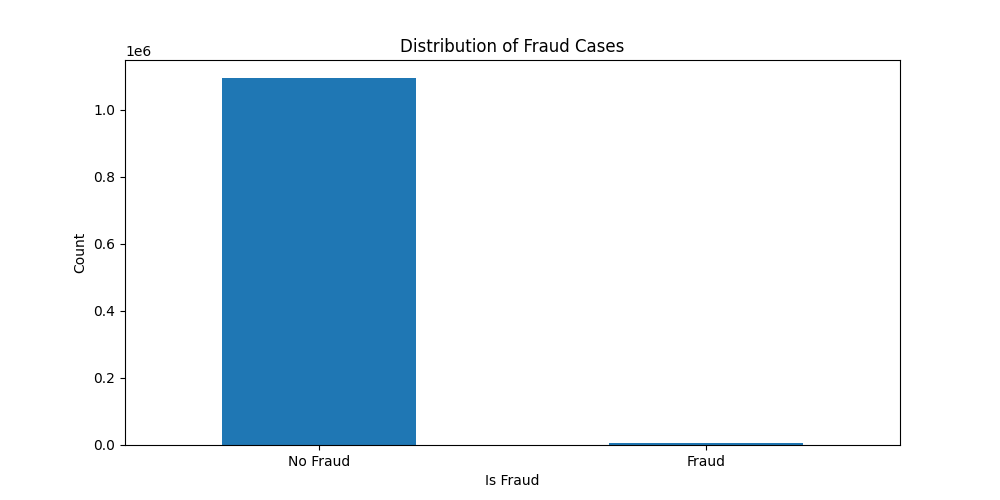

In [24]:
import PIL.Image
# #local image
image_path='./data/fraud_distribution.png'
img = PIL.Image.open(image_path)
img

## Visualize Momentum Trading Strategy DataFrame

Let's have a look on a CSV file in which we have the results of the trading strategy alongside the historical prices of NVIDIA

In [14]:
import pandas as pd
file_path='./code/nvidia_trading_strategy.csv'
df = pd.read_csv(file_path)
df.head()

,Date,Close,Short_MA,Long_MA,Signal,Position
0,NaN,NVDA,NaN,NaN,NaN,NaN
1,2023-01-03,14.301478385925293,NaN,NaN,0.0,NaN
2,2023-01-04,14.735069274902344,NaN,NaN,0.0,0.0
3,2023-01-05,14.251526832580566,NaN,NaN,0.0,0.0
4,2023-01-06,14.84496784210205,NaN,NaN,0.0,0.0
